## Forecast Modeling

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)
resample = series.resample('M')

In [4]:
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [5]:
series.shape

(3650, 1)

In [6]:
df = series.copy()

In [20]:
#Creating train and test set 
train=df.iloc[0:3000] 
test=df.iloc[2969:]

In [21]:

#Aggregating the dataset at monthly level
df_new = df.resample('M').mean()

train = train.resample('M').mean() 

test = test.resample('M').mean()

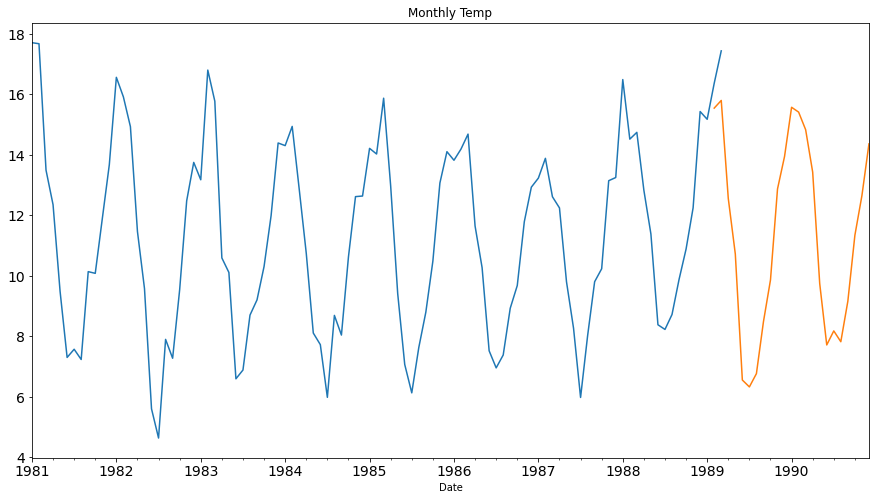

In [22]:
#Plotting data
train.Temp.plot(figsize=(15,8), title= 'Monthly Temp', fontsize=14)
test.Temp.plot(figsize=(15,8), title= 'Monthly Temp', fontsize=14)
# df_new.Temp.plot(figsize=(15,8), title= 'Monthly Temp', fontsize=14, color = 'green')
plt.show()

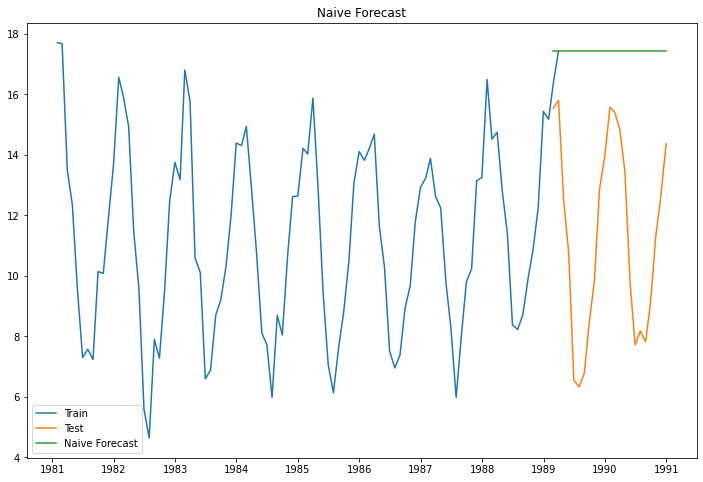

In [64]:
# Naive Method

dd= np.asarray(train.Temp)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Temp'], label='Train')
plt.plot(test.index,test['Temp'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Temp, y_hat.naive))
print(rms)

6.922104737446393


In [66]:
rms_df = pd.DataFrame()

rms_df['Forecast_Model'] = ['Naive Method']
rms_df['RMS'] = [rms]

rms_df

,Forecast_Model,RMS
0,Naive Method,6.922105


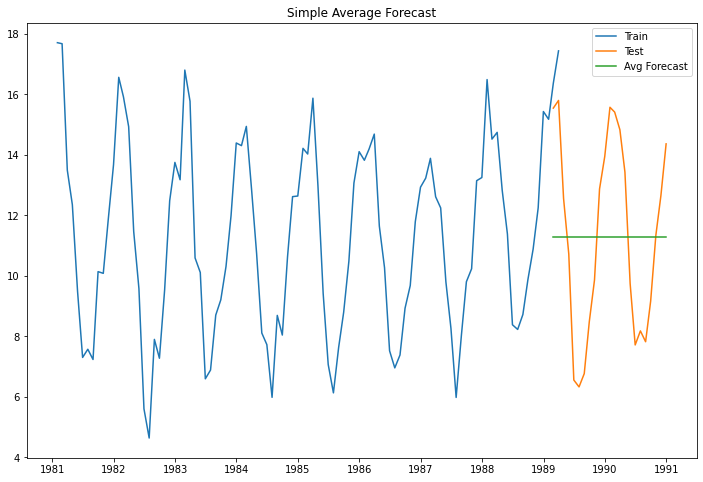

In [67]:
# Simple Average

y_hat = test.copy()
y_hat['avg_forecast'] = train.Temp.mean()
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Temp'], label='Train')
plt.plot(test.index,test['Temp'], label='Test')
plt.plot(y_hat.index, y_hat['avg_forecast'], label='Avg Forecast')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Temp, y_hat.avg_forecast))
print(rms)

3.1795683621879376


In [69]:
rms_df1 = pd.DataFrame({'Forecast_Model' : ['Simple Average'] , 'RMS' : [rms]})

In [70]:
rms_df = rms_df.append(rms_df1).reset_index(drop=True)

In [71]:
rms_df

,Forecast_Model,RMS
0,Naive Method,6.922105
1,Simple Average,3.179568


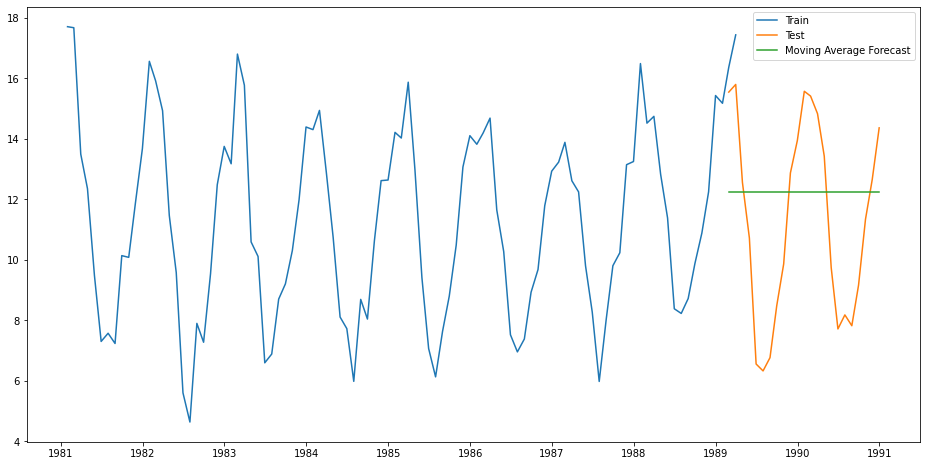

In [72]:
# Moving Average

y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Temp'].rolling(12).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [73]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Temp, y_hat_avg.moving_avg_forecast))
print(rms)

3.320681183166222


In [74]:
rms_df1 = pd.DataFrame({'Forecast_Model' : ['Moving Average Forecast'] , 'RMS' : [rms]})
rms_df = rms_df.append(rms_df1).reset_index(drop=True)
rms_df

,Forecast_Model,RMS
0,Naive Method,6.922105
1,Simple Average,3.179568
2,Moving Average Forecast,3.320681


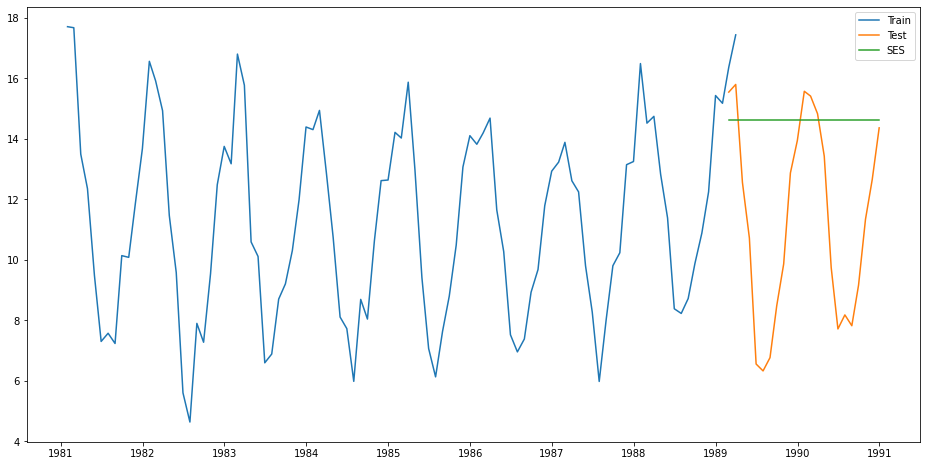

In [76]:
# Simple exponential smoothing

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Temp'])).fit(smoothing_level=0.25,optimized=True)

y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [77]:
rms = sqrt(mean_squared_error(test.Temp, y_hat_avg.SES))
print(rms)


4.604324972073438


In [78]:
rms_df1 = pd.DataFrame({'Forecast_Model' : ['Simple exponential smoothing'] , 'RMS' : [rms]})
rms_df = rms_df.append(rms_df1).reset_index(drop=True)
rms_df

,Forecast_Model,RMS
0,Naive Method,6.922105
1,Simple Average,3.179568
2,Moving Average Forecast,3.320681
3,Simple exponential smoothing,4.604325


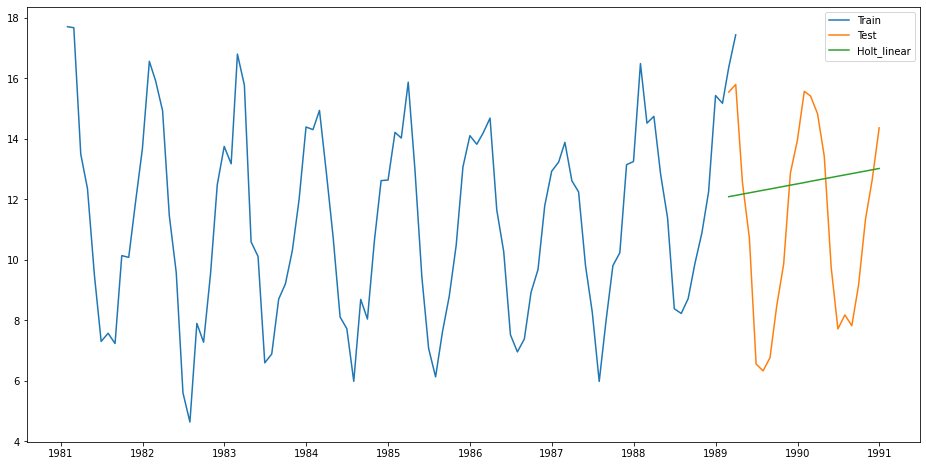

In [86]:
# Holt linear

y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Temp'])).fit(smoothing_level = 0.05,smoothing_slope = 0.04)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [87]:
rms = sqrt(mean_squared_error(test.Temp, y_hat_avg.Holt_linear))
print(rms)

3.445073834184939


In [88]:
rms_df1 = pd.DataFrame({'Forecast_Model' : ['Holt linear'] , 'RMS' : [rms]})
rms_df = rms_df.append(rms_df1).reset_index(drop=True)
rms_df

,Forecast_Model,RMS
0,Naive Method,6.922105
1,Simple Average,3.179568
2,Moving Average Forecast,3.320681
3,Simple exponential smoothing,4.604325
4,Holt linear,3.445074


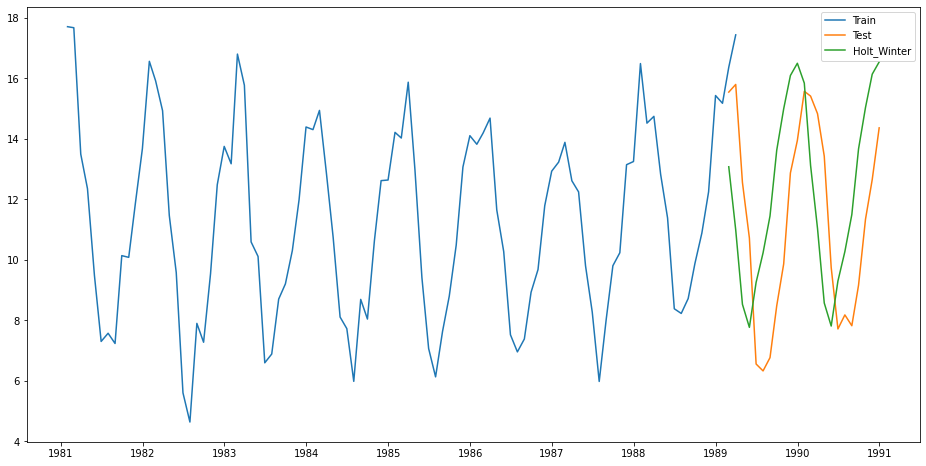

In [93]:
# Holt Winter

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Temp']) ,
                            seasonal_periods=12 ,
                            trend='add', 
                            seasonal='add',).fit()

y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [94]:
rms = sqrt(mean_squared_error(test.Temp, y_hat_avg.Holt_Winter))
print(rms)

3.5300722169941547


In [95]:
rms_df1 = pd.DataFrame({'Forecast_Model' : ['Holt_Winter'] , 'RMS' : [rms]})
rms_df = rms_df.append(rms_df1).reset_index(drop=True)
rms_df

,Forecast_Model,RMS
0,Naive Method,6.922105
1,Simple Average,3.179568
2,Moving Average Forecast,3.320681
3,Simple exponential smoothing,4.604325
4,Holt linear,3.445074
5,Holt_Winter,3.530072


Types of ARIMA Model

- ARIMA:Non-seasonal Autoregressive Integrated Moving Averages
- SARIMA:Seasonal ARIMA
- SARIMAX:Seasonal ARIMA with exogenous variables

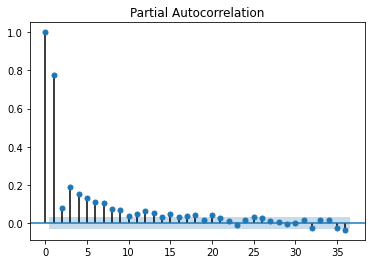

In [98]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_pacf(df)
plt.show()

# p = 1 or 2

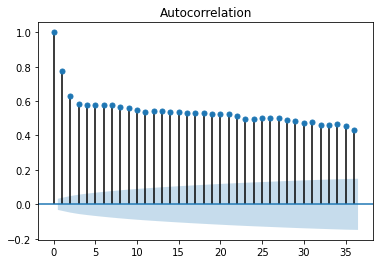

In [99]:
plot_acf(df)
plt.show()

# q = 1 o 2

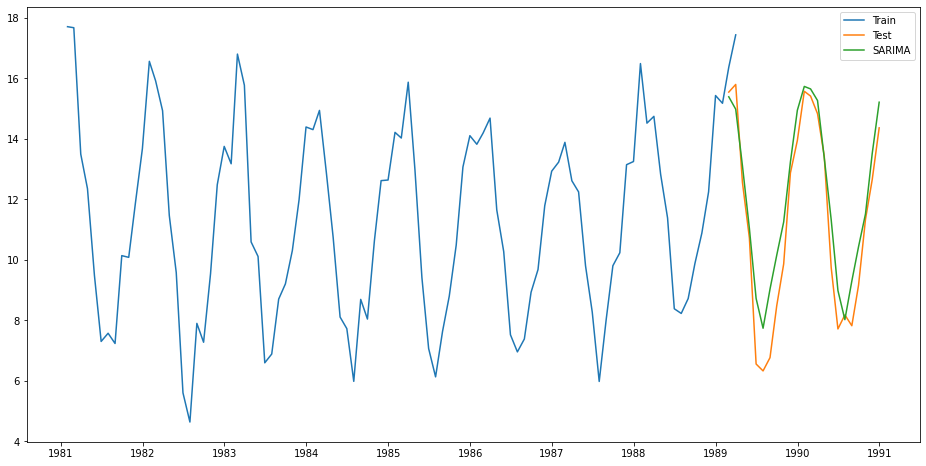

In [108]:
import statsmodels.api as sm
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Temp, 
                                 order=(1, 1, 2), # p, d, q
                                 seasonal_order=(0,1,1,12)).fit()

y_hat_avg['SARIMA'] = fit1.predict(start="1989-02-28", end="1990-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')

plt.legend(loc='best')
plt.show()

In [109]:
y_hat_avg.SARIMA

Date
1989-02-28    15.395367
1989-03-31    14.984868
1989-04-30    13.115780
1989-05-31    11.043346
1989-06-30     8.727692
1989-07-31     7.743303
1989-08-31     9.037622
1989-09-30    10.157515
1989-10-31    11.257351
1989-11-30    13.239624
1989-12-31    14.949809
1990-01-31    15.737689
1990-02-28    15.654735
1990-03-31    15.271267
1990-04-30    13.376940
1990-05-31    11.328072
1990-06-30     8.990415
1990-07-31     8.026570
1990-08-31     9.301707
1990-09-30    10.439511
1990-10-31    11.522623
1990-11-30    13.520510
1990-12-31    15.216117
Freq: M, Name: SARIMA, dtype: float64

In [102]:
test.Temp.dropna(inplace=True)

In [110]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.Temp, y_hat_avg.SARIMA))
print(rms)

1.1128313346723797


In [ ]:
rms_df1 = pd.DataFrame({'Forecast_Model' : ['SARIMA'] , 'RMS' : [rms]})
rms_df = rms_df.append(rms_df1).reset_index(drop=True)
rms_df

In [116]:
rms_df

,Forecast_Model,RMS
0,Naive Method,6.922105
1,Simple Average,3.179568
2,Moving Average Forecast,3.320681
3,Simple exponential smoothing,4.604325
4,Holt linear,3.445074
5,Holt_Winter,3.530072
7,SARIMA,1.112831


In [117]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               Temp   No. Observations:                   99
Model:             SARIMAX(1, 1, 2)x(0, 1, 1, 12)   Log Likelihood                -135.057
Date:                            Sat, 17 Apr 2021   AIC                            280.115
Time:                                    17:11:17   BIC                            292.386
Sample:                                01-31-1981   HQIC                           285.053
                                     - 03-31-1989                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9337      0.156     -5.991      0.000      -1.239      -0.628
ma.L1          0.1855      8.763      0.021      0.983     -16.990      17.361
ma.L2         -0.8138      7.048     -0.115      0.908     -14.627      13.000
ma.S.L12      -0.6381      0.164     -3.900      0.000      -0.959      -0.317
sigma2         1.2097     10.302      0.117      0.907     -18.982      21.401
===================================================================================
Ljung-Box (Q):                       32.46   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.80   Prob(JB):                         0.68
Heteroskedasticity (H):               0.59   Skew:                             0.09
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Statistical test for Stationary time series

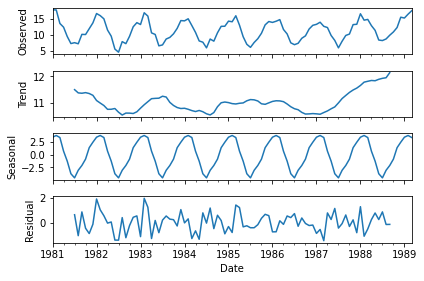

In [79]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Temp).plot()
result = sm.tsa.stattools.adfuller(train.Temp)
plt.show()

We can perform ADFuller Test to test stationary

Ho: It is non-stationary

H1: It is stationary

In [81]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(inputdate):
  result=adfuller(inputdate)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
  for value,label in zip(result,labels):
    print(label+' : '+str(value) )

  if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
  else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")



In [82]:
adfuller_test(train.Temp)

ADF Test Statistic : -0.0037447170170031474
p-value : 0.9582213027856513
#Lags Used : 11
Number of Observations : 87
weak evidence against null hypothesis,indicating it is non-stationary 
